# HW 1

## 1.1

The Taylor expansion of $u(x+kh)$ is
$$u(x+kh) = u(x) + (kh)u'(x) + \frac{(kh)^2}{2}u''(x) + \frac{(kh)^3}{6}u^{(3)}(kh) + \cdots$$

So the coefficient of $x^n$ in the 5-term approximation is
$$\frac{h^nu^{(n)}(x)}{n!}\left[(-2)^nc_{-2}+(-1)^nc_{-1}+\cdots+2^nc_2\right]$$
This should be $0$ for everything except $n=2$ where it should be $1$. We get the Vandermonde system
$$\begin{align*}
0\cdot0! &= c_{-2}+c_{-1}+c_{0}+c_{1}+c_{2}\\
0\cdot1! &= -2c_{-2}-c_{-1}+c_1+2c_2\\
1\cdot2! &= 4c_{-2}+c_{-1}+c_1+4c_2\\
0\cdot3! &= -8c_{-2}-c_{-1}+c_1+8c_2\\
0\cdot4! &= 16c_{-2}+c_{-1}+c_1+16c_2.
\end{align*}$$

Or,
$$\begin{bmatrix}
1&1&1&1&1\\
-2&-1&0&1&2\\
4&1&0&1&4\\
-8&-1&0&1&8\\
16&1&0&1&16
\end{bmatrix}\begin{bmatrix}
c_{-2}\\c_{-1}\\c_0\\c_1\\c_2
\end{bmatrix}=\begin{bmatrix}
0\\0\\2\\0\\0
\end{bmatrix}$$

## 1.2
I've copied the stencil code directly from the [the link given](https://github.com/rjleveque/amath585w2020/blob/master/notebooks/fdstencil.ipynb), and these are the coefficients:

In [24]:
from pylab import *
from scipy.special import factorial
def fdcoeffV(k,xbar,x):
    x = array(x)  # in case a list or tuple passed in, convert to numpy array
    n = len(x)
    if k >=n:
        raise ValueError('*** len(x) must be larger than k')
        
    A = ones((n,n))
    xrow = x - xbar  # displacement vector
    
    for i in range(1,n):
        A[i,:] = (xrow**i) / factorial(i)
      
    condA = cond(A)  # condition number
    if condA > 1e8:
        print("Warning: condition number of Vandermonde matrix is approximately %.1e" % condA)
        
    b = zeros(x.shape)
    b[k] = 1.
    
    c = solve(A,b)
    
    return c
def fdstencil(k, jbar, stencil_points):
    """
    Compute and print the finite difference stencil for an order k derivative
    using at least k+1 equally spaced points.
    The stencil_points are thus assumed to be integers (indices of stencil points)
    as is jbar, the index at which the approximation is to be used.
    
    For example, the standard second order stencil for u''(x_0) 
    can be printed via
        fdstencil(2, 0, [-1,0,1])
    """
    assert type(jbar) is int, '*** jbar should be an integer'
    stencil_pts = array(stencil_points)
    assert stencil_pts.dtype == int, '*** stencil_points should be integers'
    
    c = fdcoeffV(k, jbar, stencil_pts)
    
    print("Stencil for approximation to order %s derivative at U_{%s} is:" \
          % (str(k), str(jbar)))
    coeffs = ['%s / h^2' % str(cj) for cj in c]
    s = '[' 
    for j in range(len(c)):
        subj = str(stencil_pts[j])
        cj = c[j]
        sj = '%g U_{%s}' % (abs(cj), stencil_pts[j])
        if cj >= 0:
            s = s + ' + ' + sj
        else:
            s = s + ' - ' + sj
    s = s + '] / h^%i' % k
    print(s)
    return c

c = fdstencil(2, 0, [-2, -1, 0, 1, 2])

Stencil for approximation to order 2 derivative at U_{0} is:
[ - 0.0833333 U_{-2} + 1.33333 U_{-1} - 2.5 U_{0} + 1.33333 U_{1} - 0.0833333 U_{2}] / h^2


These do in fact satisfy the conditions:

In [45]:
import numpy as np
np.set_printoptions(precision=2)
V = np.array([
    [1,  1,  1, 1,  1],
    [-2, -1, 0, 1,  2],
    [4,  1,  0, 1,  4],
    [-8, -1, 0, 1,  8],
    [16, 1,  0, 1, 16],
])

print(V @ c)
print("All close to correct values?", all(np.isclose(V @ c, [0, 0, 2, 0, 0])))

[ 3.05e-16 -5.55e-17  2.00e+00 -2.22e-15 -2.22e-15]
All close to correct values? True


## 1.3

In [82]:
def u(x): return np.sin(2*x)
exact_value = -4*u(1)

print("[   h      error  ]")
hvals = np.logspace(-1, -4, 13)
herrs = []
for h in hvals:
    value = c @ [u(1-2*h), u(1-h), u(1), u(1+h), u(1+2*h)] / h**2
    err = value - exact_value
    herrs.append(err)
    print(np.array([h, err]))

[   h      error  ]
[1.00e-01 6.44e-05]
[5.62e-02 6.46e-06]
[3.16e-02 6.46e-07]
[1.78e-02 6.47e-08]
[1.00e-02 6.46e-09]
[5.62e-03 6.43e-10]
[3.16e-03 4.79e-11]
[ 1.78e-03 -5.23e-11]
[ 1.00e-03 -3.23e-10]
[ 5.62e-04 -6.14e-10]
[ 3.16e-04 -4.75e-09]
[ 1.78e-04 -1.83e-08]
[ 1.00e-04 -3.79e-08]


c:\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log
  after removing the cwd from sys.path.


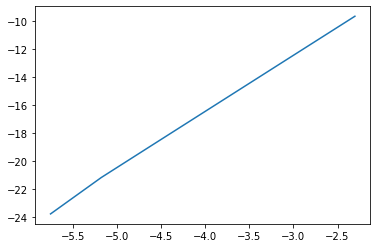

In [83]:
# Log-log plot
import matplotlib.pyplot as plt
x = np.log(hvals)
y = np.log(herrs)
plt.plot(x, y);

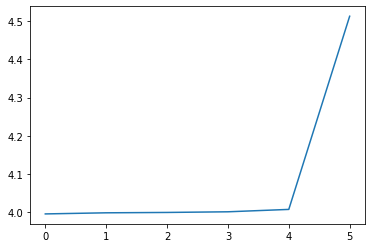

In [84]:
# Slope of log-log plot
plt.plot((y[:-1]-y[1:])/(x[:-1]-x[1:]));

As you can see, the slope is fourth-order (as expected) for larger values of $h$. Finally, I'm a little confused by what this means in the homework: "compare against the predicted error from the leading term of the expression printed by fdstencil." My best guess is to take the Taylor series out two degrees further to get a theoretical guess of the error, and compare against that.

The Taylor coefficient for $h^5$ works out to be about $0$ because we're using a centered difference approximation. (This is why I said take it out two degrees further.) The Taylor coefficient for $h^6$ is

$$\frac{(-2)^6c_{-2}+(-1)^6c_1+0^6c_0+1^6c_1+2^6c_2}{6!}\cdot u^{(6)}(1)$$

so a theoretical error approximation would be

$$\frac{c\cdot [64\ 1\ 0\ 1\ 64]}{6!}\cdot u^{(6)}(1) \cdot h^4$$

(as the finite difference approximation divides by $h^2$). I've hardcoded in $u^{(6)}(1) = -64u(1)$ below. It matches the computed error pretty well for larger values of $h$.

In [86]:
taylor_coeff_x6 = tc = c @ [64, 1, 0, 1, 64] / factorial(6) * (-64*u(1))
print("[h computed_error theoretical_error]")
for h in hvals:
    value = c @ [u(1-2*h), u(1-h), u(1), u(1+h), u(1+2*h)] / h**2
    computed_err = value - exact_value
    theoretical_err = tc*h**4
    print(np.array([h, computed_err, theoretical_err]))

[h computed_error theoretical_error]
[1.00e-01 6.44e-05 6.47e-05]
[5.62e-02 6.46e-06 6.47e-06]
[3.16e-02 6.46e-07 6.47e-07]
[1.78e-02 6.47e-08 6.47e-08]
[1.00e-02 6.46e-09 6.47e-09]
[5.62e-03 6.43e-10 6.47e-10]
[3.16e-03 4.79e-11 6.47e-11]
[ 1.78e-03 -5.23e-11  6.47e-12]
[ 1.00e-03 -3.23e-10  6.47e-13]
[ 5.62e-04 -6.14e-10  6.47e-14]
[ 3.16e-04 -4.75e-09  6.47e-15]
[ 1.78e-04 -1.83e-08  6.47e-16]
[ 1.00e-04 -3.79e-08  6.47e-17]
